# Manipulación de Datos

En este segundo notebook se dejan de lado los modelos de aprendizaje computacional para centrarse en los datos en si mismos: Como cargarlos, como operarlos y como exportarlos.

## Importar librerías

Al igual que en el primer cuaderno, se cargará la librería numpy y la interfaz funcional de matplotlib. Pero hay un par de novedades. Por un lado, la librería Pilow para cargar imágenes. Por el otro, el módulo de tratamiento de imágenes n-dimensionales de la librería SciPy. Realmente SciPy es una colección de librerías de utilidades matemáticas para distintos campos, en este cuaderno se utiliza únicamente la relacionada con imágenes.

In [1]:
# Cargar librerías
import numpy as np
import PIL as pil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from math import floor, ceil, sqrt, pi, sin, cos

In /home/uadmin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/uadmin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/uadmin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/uadmin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/uadmin/.local/lib/python3.7/site-packages/matplotlib/mpl-data/s

## Cargar imagen

A continuación se muestra como utilizar Pilow para cargar una imagen

Dimensionalidad del mdt:  (1000, 1000, 3)


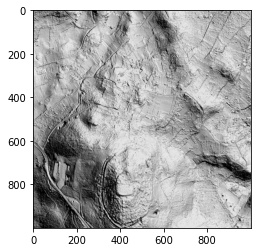

In [2]:
mdt_jpg = pil.Image.open('../img/MDT_SanAmaro.jpg')  # Cargar el MDT en formato jpg
mdt = np.asarray(mdt_jpg)  # Traducir el formato JPG a una matriz numérica

# Informar sobre el tamaño del mdt
print('Dimensionalidad del mdt: ', mdt.shape)

# Imprimir el mdt
plt.imshow(mdt)
plt.show()

In [3]:
# Como la imagen es en blanco y negro, se resumen los canales RGB a 1 canal blanco-negro
img = mdt[:,:,0]

# Informar sobre el tamaño de la imagen
print('Dimensionalidad de la imagen: ', img.shape)

Dimensionalidad de la imagen:  (1000, 1000)


## Funciones personalizadas

Un concepto bastante útil es el de definir una función personalizada que vaya a ser llamada con frecuencia. En primer lugar, se definirá una función que reciba una lista de imágenes y las muestre.

La sintaxis para definir una función es
```def nombre(arg1, ..., argN):```

La palabra `def` indica que se está definiendo una función, a continuación se especifica el nombre que se le desea dar y, por último, la lista de argumentos. Después, únicamente queda por definir el conjunto de pasos a seguir cada vez que se llame a la función. Como detalle, mencionar que en python las funciones pueden esperar recibir un diccionario de variables generalmente conocido como `**kwargs`. A diferencia de otros lenguajes de programación, no es necesario especificar de ante mano todos y cada uno de los argumentos, sino que pueden desempaquetarse del mencionado diccionario.

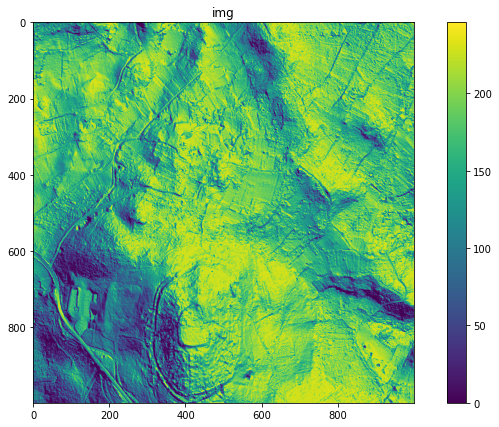

In [4]:
# Funcion para imprimir imágenes
def implot(imgs, titles=None, cmap='viridis'):    
    plotid = 1
    plotdim = ceil(sqrt(len(imgs)))
    fig = plt.figure(figsize=(12, 7))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(plotdim, plotdim, plotid)
        im = ax.imshow(img, cmap=cmap)
        fig.colorbar(im)
        if titles is not None:
            ax.set_title(titles[i])        
        
        plotid += 1
        
    plt.show()
    
    
implot([img], ['img'])

## Pooling

En el cuaderno anterior se explicó como utilizar pooling en el contexto de una red neuronal. Ahora se visualiza que le ocurre a la imagen cuando se realiza pooling sobre la misma, partiendo de una implementación propia.

Para ello se define una función que recibe como primer parámetro la imagen, como segundo parámetro las dimensiones de la ventana (**w**indow) y como tercero la configuración del paso (**s**tride). Además se permite utilizar un cuarto parámetro para especificar la función de pooling ($max$, $min$, promedio, ...) y un quinto para fijar un valor máximo permitido.

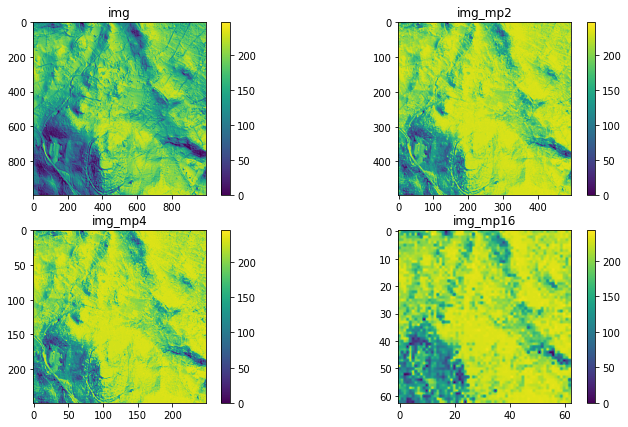

In [5]:
# Función para aplicar pooling (por defecto función máximo)
def pool(X, w=[3, 3], s=[2, 2], f=np.max, clip_max=None):
    Y = []
    m = X.shape[0]
    n = X.shape[1]
    for i0 in range(0,m,s[0]):
        i1 = i0 + w[0]  # Computar índice de fin de fila
        if i1 >= m:  # Comprobar límites
            break
        y = []
        for j0 in range(0,n,s[1]):
            j1 = j0 + w[1]  # Computar índice de fin de columna
            if j1 >= n:  # Comprobar límites
                break
            y.append(f(X[i0:i1,j0:j1]))  # TODO Restore
        Y.append(y)
    if clip_max is not None:
        Y = np.clip(Y, np.min(Y), clip_max)
    return np.array(Y)

    
img_mp2 = pool(img, w=[4, 4], s=[2, 2])
img_mp4 = pool(img, w=[4, 4], s=[4, 4])
img_mp16 = pool(img, w=[4, 4], s=[16, 16])
implot([img, img_mp2, img_mp4, img_mp16], titles=['img', 'img_mp2', 'img_mp4', 'img_mp16'])

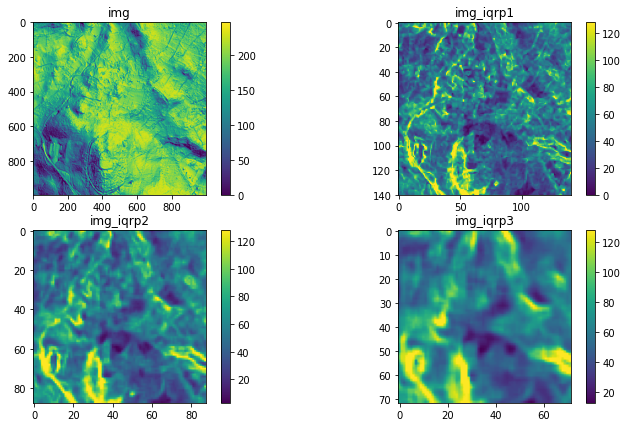

In [6]:
# Función de pooling por rango intercuantilico
def iqr_poolf(A):
    a, b = np.quantile(A.flatten(), [0.2, 0.8])
    return b-a
    
img_iqrp1 = pool(img, w=[16, 16], s=[7, 7], f=iqr_poolf, clip_max=128)
img_iqrp2 = pool(img, w=[32, 32], s=[11, 11], f=iqr_poolf, clip_max=128)
img_iqrp3 = pool(img, w=[64, 64], s=[13, 13], f=iqr_poolf, clip_max=128)
implot([img, img_iqrp1, img_iqrp2, img_iqrp3], titles=['img', 'img_iqrp1', 'img_iqrp2', 'img_iqrp3'])

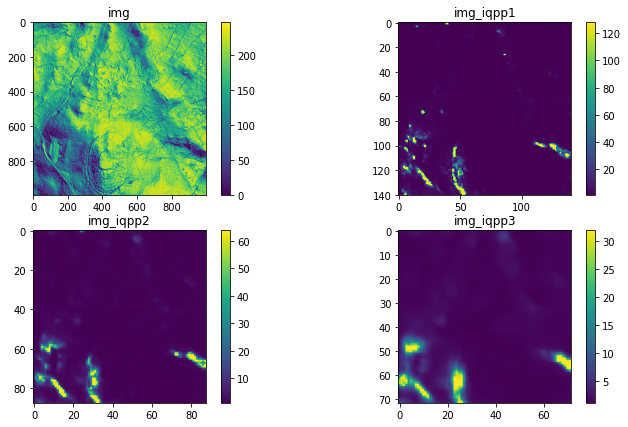

In [7]:
# Función de pooling por proporción intercuantilica
def iqp_poolf(A):
    a, b = np.quantile(A.flatten(), [0.2, 0.8])
    return b/(a+0.0000001)
    
img_iqpp1 = pool(img, w=[16, 16], s=[7, 7], f=iqp_poolf, clip_max=128)
img_iqpp2 = pool(img, w=[32, 32], s=[11, 11], f=iqp_poolf, clip_max=64)
img_iqpp3 = pool(img, w=[64, 64], s=[13, 13], f=iqp_poolf, clip_max=32)
implot([img, img_iqpp1, img_iqpp2, img_iqpp3], titles=['img', 'img_iqpp1', 'img_iqpp2', 'img_iqpp3'])

## Aplicaciones afines

Al ser la imagen una matriz, es bastante directo y sencillo pensar en usar aplicaciones afines para transformar la misma. Cualquier aplicación afín puede entenderse como una transformación tal que $Y = C + AX$, donde $A$ sería una matriz asociada a una aplicación lineal y $C$ un vector columna.

Por ejemplo, para **rotar** una imagen, bastaría con considerar la matriz como una estructura espacial en $\mathbb{R}^{2}$ tal que cada pixel es un punto en el espacio con coordenadas $(i, j)$, siendo $i$ la fila y $j$ la columna en la matriz.

Para implementar una función que rote la imagen en un ángulo $\phi$ en primer lugar hay que generar
$
A = \left[\begin{array}{cc}
\cos(\phi) & -\sin(\phi) \\
\sin(\phi) & \cos(\phi)
\end{array}\right]
$
.

Después se debe despejar $C = (I-A)Q$ donde $Q$ es el centro de rotación. Si la imagen fuese una matriz con $m$ filas y $n$ columnas, se tendría $Q = \left(\frac{m}{2}, \frac{n}{2}\right)$.

Así, los índices en la matriz-imagen rotada quedarían definidos por la expresión:
$
\left[\begin{array}{c}
i' \\
j'
\end{array}\right]
=
\left[\begin{array}{c}
c_1 \\
c_2
\end{array}\right]
+
\left[\begin{array}{cc}
\cos(\phi) & -\sin(\phi) \\
\sin(\phi) & \cos(\phi)
\end{array}\right]
\left[\begin{array}{c}
i \\
j
\end{array}\right]
$

Aunque aquí con propósito didáctico se explica como usar una aplicación afín sobre la imagen, la propia librería SciPy que se verá más adelante trae implementada su propia función de rotación, de zoom o de transformación afín. Para más información véanse, por ejemplo:
```
scipy.ndimage.affine_transform
scipy.ndimage.rotate
scipy.ndimage.transform
```

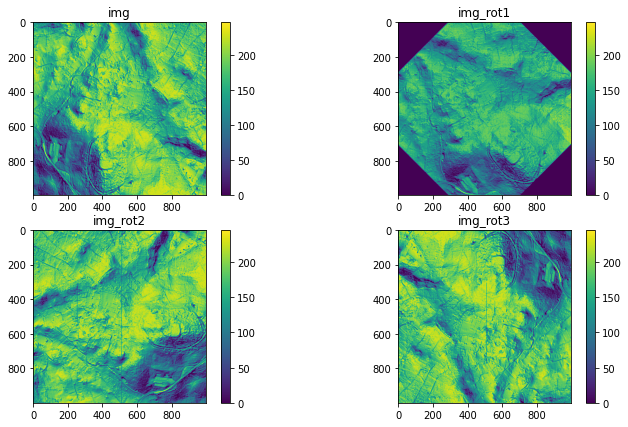

In [8]:
# Función para rotar
def rotate(X, ang=pi/2):
    # Componer la rotación Y = C + AX
    I = np.eye(2)
    _cos = cos(ang)
    _sin = sin(ang)
    A = np.array([[_cos, -_sin],[_sin, _cos]])
    m = img.shape[0]
    n = img.shape[1]
    C = np.matmul((I-A), np.array([[m/2],[n/2]]))
    
    # Aplicar la rotación
    Y = np.zeros(np.array(X.shape))
    for i0 in range(m):
        for j0 in range(n):
            i1, j1 = C + np.matmul(A, np.array([[i0], [j0]]))
            if i1 >= m or j1 >= n:  # Comprobar límites
                continue
            Y[int(i1), int(j1)] = X[i0, j0]
    return Y


img_rot1 = rotate(img, ang=pi/4)
img_rot2 = rotate(img, ang=pi/2)
img_rot3 = rotate(img, ang=pi)
implot([img, img_rot1, img_rot2, img_rot3], titles=['img', 'img_rot1', 'img_rot2', 'img_rot3'])    

## Filtros

En el mundo del procesamiento de imágenes es bastante frecuente aplicar filtros para transformar las mismas. Generalmente un filtro puede entenderse como una convolución basada en un kernel determinado. Los filtros tienen distintas aplicaciones tradicionales: Detección de bordes, enfoque/desenfoque, suavizado, etc.

La propia red neuronal convolucional podría encontrar patrones interesantes al ajustar los pesos del kernel que aplica a la imagen de entrada. Analizar la aplicación de filtros permite entender mejor lo que ocurre de fondo en una CNN. Pero, además, en caso de encontrar alguna combinación de filtros concreta que pueda resultar interesante podría añadirse como un canal más en la imagen de entrada. No obstante, debe tenerse en cuenta que la propia red neuronal ajusta los pesos de sus convoluciones para configurar los kernels de mayor interés para resolver su tarea concreta. Por tanto, no conviene abusar de incrementar los canales de entrada a base de aplicar filtros a la imagen original, salvo que se considere que la información que aportan resulta especialmente interesante.

En esta sección se muestra como aplicar **filtros**, como pueden **componerse los filtros**, se **visualiza la salida** resultante y, además, se observa como varía la distribución de valores de la imagen analizando el **histograma** de la misma.

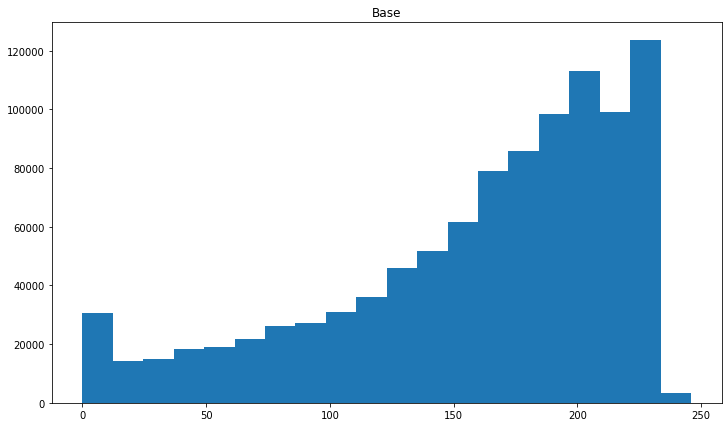

In [9]:
# Función para representar histogramas a partir de imágenes blanco-negro
def imhist(imgs, titles=None, bins=20):    
    plotid = 1
    plotdim = ceil(sqrt(len(imgs)))
    fig = plt.figure(figsize=(12, 7))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(plotdim, plotdim, plotid)
        im = ax.hist(img.flatten(), bins=bins)
        if titles is not None:
            ax.set_title(titles[i])        
        
        plotid += 1
        
    plt.show()
    
imhist([img], titles=['Base'])

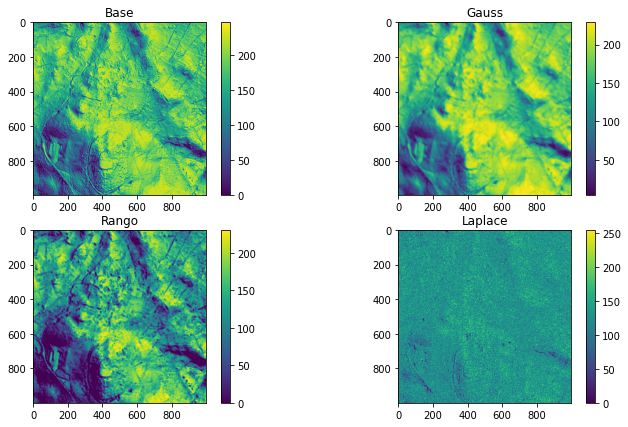

In [10]:
# Aplicar filtro gausiano con desviacion tipica 4.0
img_gaus = ndi.filters.gaussian_filter(img, sigma=4.0)

# Aplicar filtro de rango 4 con ventana (8, 8)
img_rnk = ndi.filters.rank_filter(img, 4, size=(8, 8))

# Aplicar filtro laplaciano
img_lpc = ndi.filters.laplace(img)

implot([img, img_gaus, img_rnk, img_lpc], titles=['Base', 'Gauss', 'Rango', 'Laplace'])

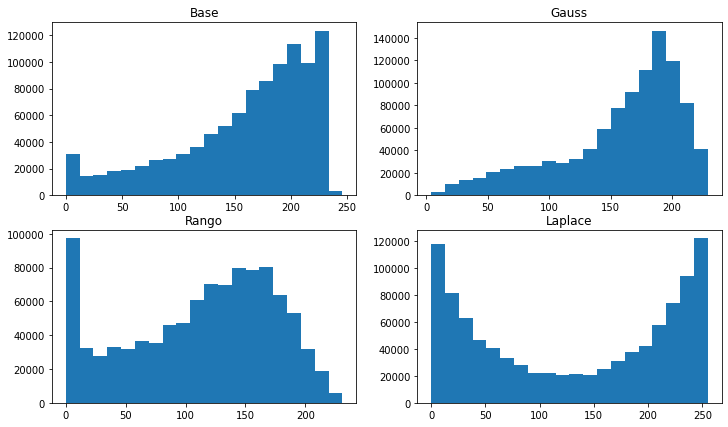

In [11]:
# Visualizar las distribuciones para los filtros gausiano, de rango y laplaciano
imhist([img, img_gaus, img_rnk, img_lpc], titles=['Base', 'Gauss', 'Rango', 'Laplace'])

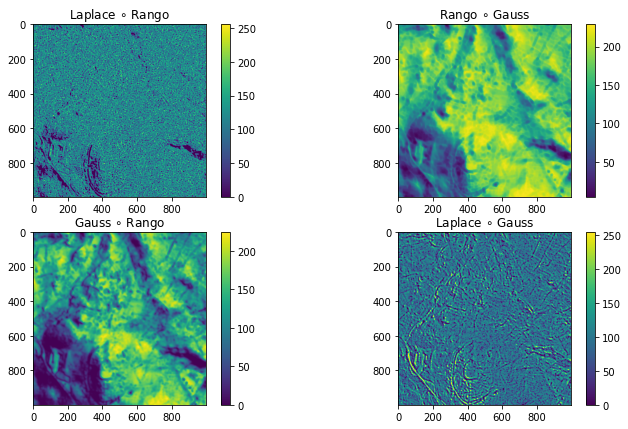

In [12]:
# Aplicar filtro laplaciano compuesto con filtro de rango
img_lor = ndi.filters.laplace(img_rnk)

# Aplicar filtro de rango compuesto con el filtro gausiano
img_rog = ndi.filters.rank_filter(img_gaus, 4, size=(8,8))

# Aplicar filtro gausiano compuesto con filtro de rango
img_gor = ndi.filters.gaussian_filter(img_rnk, sigma=4.0)
                                 
# Aplicar filtro laplaciano compuesto con filtro gausiano
img_log = ndi.filters.laplace(img_gaus)

implot(
    [img_lor, img_rog, img_gor, img_log],
    titles=['Laplace $\circ$ Rango', 'Rango $\circ$ Gauss', 'Gauss $\circ$ Rango', 'Laplace $\circ$ Gauss']
)

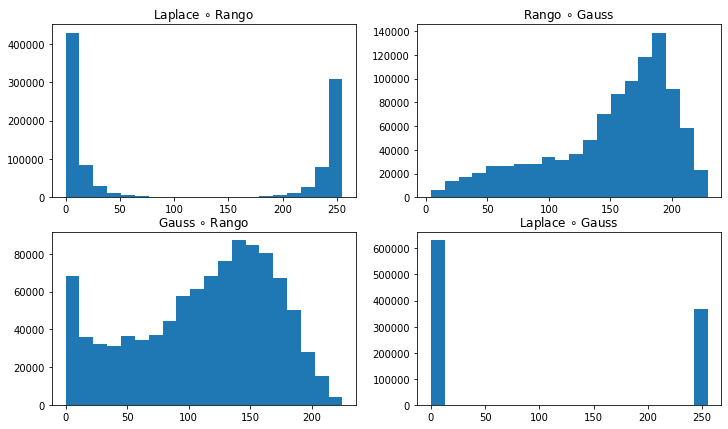

In [13]:
# Visualizar las distribuciones para los filtros compuestos
imhist(
    [img_lor, img_rog, img_gor, img_log],
    titles=['Laplace $\circ$ Rango', 'Rango $\circ$ Gauss', 'Gauss $\circ$ Rango', 'Laplace $\circ$ Gauss']
)

## Operadores morfológicos

Los operadores morfológicos son una técnica habitual en el tratamiento de imágenes y vídeo. Sus fundamentos teóricos se encuentran en el estudio de la geometría y la topología. Se tratan de operaciones sencillas que pueden ser útiles para detectar características, anular ruido, corregir pequeñas imperfecciones o cuestiones similares sobre una matriz. Este cuaderno se limita a por un lado presentar los dos operadores fundamentales: la erosión y la dilatación. Por el otro, a mostrar dos operadores derivados de estos: la apertura y el cierre. Se explican a continuación en su formato binario, aunque para aplicarlos a imágenes con canal no binario se usarán sus versiones para **escala de grises**.

**Erosión** Dado un kernel $K$, se niega el 1 cuando, al aplicarse sobre la imagen $A$, no se satisface el kernel para la submatriz asociada al elemento $ij$.

$
K = \left[\begin{array}{cc}
\textbf{1} & 1 \\
0 & 1
\end{array}\right],\;
A = \left[\begin{array}{cccc}
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 
\end{array}\right],\;
A' = \left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 1 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]
$


**Dilatación** Dado un kernel $K$, se niega el 0 cuando, al aplicarse sobre la imagen $A$, se satisface algún elemento del kernel en la submatriz asociada al elemento $ij$, considerando únicamente submatrices $A_{ij}$ donde el elemento asociado sea $a_{ij} = 1,\, \forall a_{ij} \in A$.

$
K = \left[\begin{array}{cc}
\textbf{1} & 1 \\
1 & 0
\end{array}\right],\;
A = \left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right],\;
A' = \left[\begin{array}{cccc}
1 & 1 & 0 & 0 \\
1 & 1 & 1 & 1 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 0
\end{array}\right]
$



**Apertura** Es la combinación ordenada de erosión y dilatación con el mismo kernel $K$ sobre una imagen $A$. Primero se aplica la erosión a la imagen y luego la dilatación. 

**Cierre** Es el contrario de la apertura, una combinación ordenada de dilatación y erosión con el mismo kernel $K$ sobre una imagen $A$. Primero se aplica la dilatación a la imagen y luego la erosión.

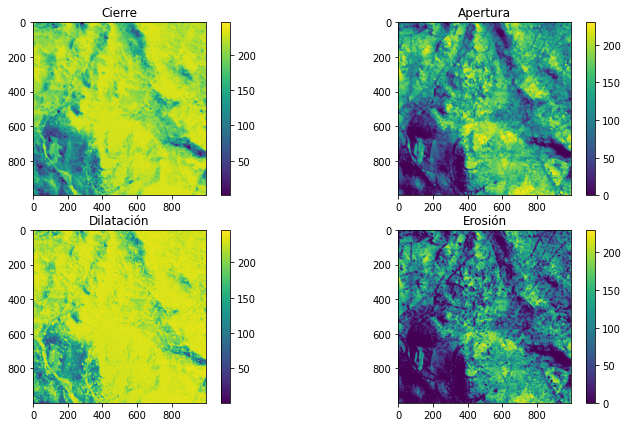

In [14]:
# Aplicar operador morfológico de cierre
img_clo = ndi.grey_closing(img, size=(8, 8))

# Aplicar operador morfológico de apertura
img_ope = ndi.grey_opening(img, size=(8, 8))

# Aplicar operador morfológico de dilatación
img_dil = ndi.grey_dilation(img, size=(8, 8))

# Aplicar operador morfológico de erosión
img_ero = ndi.grey_erosion(img, size=(8, 8))


implot([img_clo, img_ope, img_dil, img_ero], titles=['Cierre', 'Apertura', 'Dilatación', 'Erosión'])

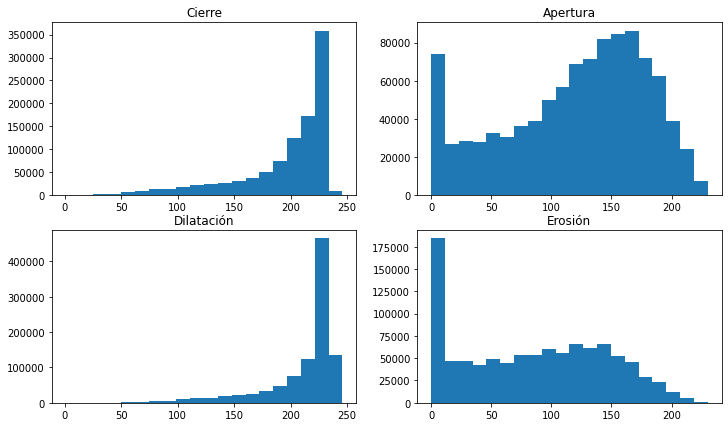

In [15]:
# Visualizar las distribuciones para los operadores morfológicos
imhist([img_clo, img_ope, img_dil, img_ero], titles=['Cierre', 'Apertura', 'Dilatación', 'Erosión'])

## Exportar

Supóngase que, tras experimentar con distintas operaciones, se llega a una cadena de procesamiento que genera una versión de la imagen que contiene información de especial interés. En este caso se tomarán dos cadenas de operaciones que detectan los píxeles del castro, separándolos claramente de la mayor parte de la imagen. Además. se tomarán de dos maneras diferentes. Por arriba, es decir, resaltándolos como valores elevados en el gradiente. Pero también por abajo, tal que se resaltarán como valores reducidos en el gradiente.

En lo que a la detección por abajo se tiene, por un lado, una primera cadena que consiste en aplicar un filtro de rango, después un filtro laplaciano y por último un operador morfológico de dilatación. Por el otro, la segunda cadena consiste en aplicar un filtro de rango, después un filtro laplaciano y por último un operador morfológico de cierre.

En cuanto a la detección por arriba se tiene, por un lado, una primera cadena que consiste en aplicar un filtro gausiano, después un filtro laplaciano y por último un operador morfológico de erosión. Por el otro, la segunda cadena consiste en aplicar un filtro gausiano, después un filtro laplaciano y por último un operador morfológico de apertura.

Una vez transformadas las matrices, supóngase que se quieren exportar como imágenes (podrían exportarse en formato matricial binario, como un CSV o con la estructura que se considere oportuna). Para ello se convierten de vuelta utilizando la librería Pilow que se usó para leerlas y, finalmente, se exportan a la ruta deseada en el disco duro.

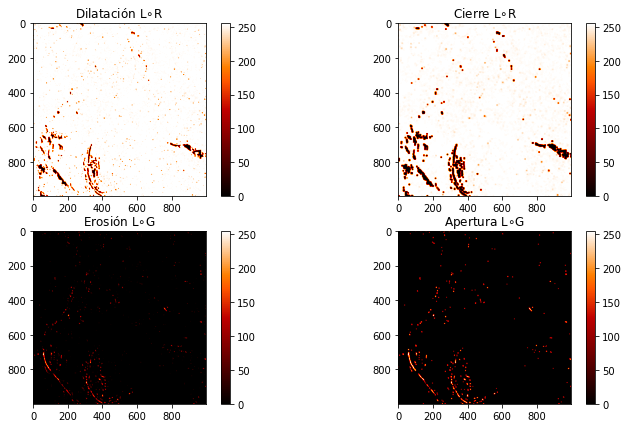

In [16]:
# Operador morfológico de dilatación sobre la composición de un filtro laplaciano con un filtro de rango
img_dlr = ndi.grey_dilation(img_lor, size=(6, 6))
# Operador morfológico de cierre sobre la composición de un filtro laplaciano con un filtro de rango
img_clr = ndi.grey_closing(img_lor, size=(8, 8))
# Operador morfológico de erosión sobre la composición de un filtro laplaciano con un filtro gausiano
img_elg = ndi.grey_erosion(img_log, size=(3, 3))
# Operador morfológico de apertura sobre la composición de un filtro laplaciano con un filtro gausiano
img_olg = ndi.grey_opening(img_log, size=(4, 4))

implot(
    [img_dlr, img_clr, img_elg, img_olg],
    titles=['Dilatación L$\circ$R', 'Cierre L$\circ$R', 'Erosión L$\circ$G', 'Apertura L$\circ$G'],
    cmap='gist_heat'
)

In [17]:
# Convertir los arrays numéricos en imágenes
img1 = pil.Image.fromarray(img_dlr)
img2 = pil.Image.fromarray(img_clr)
img3 = pil.Image.fromarray(img_elg)
img4 = pil.Image.fromarray(img_olg)


# Exportar las imágenes
img1.save("../img/MDT_SanAmaro_DLR.jpg")
img2.save("../img/MDT_SanAmaro_CLR.jpg")
img3.save("../img/MDT_SanAmaro_ELG.jpg")
img4.save("../img/MDT_SanAmaro_OLG.jpg")

In [18]:
# Exportar salidas de pooling para visualizarlas fuera del cuaderno
img5 = pil.Image.fromarray(ndi.zoom(img_iqrp1, img.shape[0]/img_iqrp1.shape[0])).convert("L")
img6 = pil.Image.fromarray(ndi.zoom(img_iqrp2, img.shape[0]/img_iqrp2.shape[0])).convert("L")
img7 = pil.Image.fromarray(ndi.zoom(img_iqrp3, img.shape[0]/img_iqrp3.shape[0])).convert("L")
img8 = pil.Image.fromarray(ndi.zoom(img_iqpp1, img.shape[0]/img_iqpp1.shape[0])).convert("L")
img9 = pil.Image.fromarray(ndi.zoom(img_iqpp2, img.shape[0]/img_iqpp2.shape[0])).convert("L")
img10 = pil.Image.fromarray(ndi.zoom(img_iqpp3, img.shape[0]/img_iqpp3.shape[0])).convert("L")
img5.save("../img/MDT_SanAmaro_IQRP1.jpg")
img6.save("../img/MDT_SanAmaro_IQRP2.jpg")
img7.save("../img/MDT_SanAmaro_IQRP3.jpg")
img8.save("../img/MDT_SanAmaro_IQPP1.jpg")
img9.save("../img/MDT_SanAmaro_IQPP2.jpg")
img10.save("../img/MDT_SanAmaro_IQPP3.jpg")